In [ ]:
from google.cloud import vision
from pdf2image import convert_from_path
from PIL import Image, ImageDraw
import io
import fitz  # PyMuPDF



In [7]:

def pdf_to_images(pdf_path):
    """Convert PDF pages to a list of image objects."""
    images = convert_from_path(pdf_path)
    return images

def detect_text_in_image(image):
    """Performs text detection on a PIL image."""
    client = vision.ImageAnnotatorClient()
    
    # Convert PIL image to binary content
    image_content = io.BytesIO()
    image.save(image_content, format='PNG')
    image_content = image_content.getvalue()
    
    # Pass the image content to Google Vision API
    image = vision.Image(content=image_content)
    response = client.text_detection(image=image)
    
    if response.error.message:
        raise Exception(f"Error during text detection: {response.error.message}")

    return [text.description for text in response.text_annotations]

def process_pdf(pdf_path):
    """Processes each page of a PDF for text extraction using OCR."""
    images = pdf_to_images(pdf_path)
    all_text = []
    
    for i, image in enumerate(images):
        print(f"Processing page {i+1}...")
        text = detect_text_in_image(image)
        all_text.append("\n".join(text))
    
    return "\n".join(all_text)



In [16]:
def convert_pil_to_vision_image(pil_image):
    """
    Converts a PIL Image to a Google Vision Image format.
    """
    img_byte_array = io.BytesIO()
    pil_image.save(img_byte_array, format='PNG')  # Save image to bytes in PNG format
    content = img_byte_array.getvalue()
    return vision.Image(content=content)

def annotate_image(pil_image):
    """
    Annotates a given PIL image object with detected text bounding boxes
    using Google Vision API and displays or saves the result.
    """
    # Initialize the Vision API client
    client = vision.ImageAnnotatorClient()

    # Convert the PIL image to Google Vision format
    image = convert_pil_to_vision_image(pil_image)

    # Perform text detection
    response = client.text_detection(image=image)
    texts = response.text_annotations

    # Draw on the original PIL image
    draw = ImageDraw.Draw(pil_image)

    # Iterate over detected texts
    for i, text in enumerate(texts):
        # Get the bounding box vertices
        vertices = [(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]

        # Draw a polygon based on the bounding box
        # if len(vertices) == 4:
        #     draw.polygon(vertices, outline="red", width=2)
            #draw.text(vertices[0], text.description, fill="black")

    # Save or display the annotated image
    pil_image.show()  # Display the image with annotations
    # pil_image.save('annotated_image.png')  # Uncomment to save the annotated image


In [99]:
import fitz  # PyMuPDF

def get_image_metadata_from_pdf(pdf_path):
    """
    Extracts metadata of images embedded in each page of a scanned PDF,
    including page dimensions in points and inches, and calculates DPI if missing.
    """
    doc = fitz.open(pdf_path)
    image_metadata = []
    
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        
        # Get page dimensions in points and inches
        page_width_pts, page_height_pts = page.rect.width, page.rect.height
        page_width_in = page_width_pts / 72  # Convert points to inches
        page_height_in = page_height_pts / 72
        
        # Extract the list of images on this page
        images = page.get_images(full=True)  # 'full=True' gets all images on page
        
        for img_index, img in enumerate(images):
            xref = img[0]  # Image reference number
            base_image = doc.extract_image(xref)
            
            # Retrieve metadata about the image
            width_px, height_px = base_image["width"], base_image["height"]
            dpi_x, dpi_y = base_image.get("dpi", (None, None))
            
            # Calculate DPI if not provided
            if dpi_x is None or dpi_y is None:
                dpi_x = width_px / page_width_in
                dpi_y = height_px / page_height_in
            
            # Append metadata, including page dimensions and calculated DPI
            image_metadata.append({
                "page": page_num + 1,
                "image_index": img_index + 1,
                "width_px": width_px,
                "height_px": height_px,
                "format": base_image["ext"],
                "dpi_x": dpi_x,
                "dpi_y": dpi_y,
                "page_width_pts": page_width_pts,
                "page_height_pts": page_height_pts,
                "page_width_in": page_width_in,
                "page_height_in": page_height_in,
            })
    
    doc.close()
    return image_metadata

In [97]:
pdf_path = '../books/TEST-phat-giao-viet-nam-1956-05-06.pdf'
#images = pdf_to_images(pdf_path)

In [100]:
get_image_metadata_from_pdf(pdf_path)

[{'page': 1,
  'image_index': 1,
  'width_px': 1024,
  'height_px': 1536,
  'format': 'jpeg',
  'dpi_x': 95.51817752805862,
  'dpi_y': 95.50646677386379,
  'page_width_pts': 771.8740234375,
  'page_height_pts': 1157.9530029296875,
  'page_width_in': 10.720472547743055,
  'page_height_in': 16.08268059624566},
 {'page': 2,
  'image_index': 1,
  'width_px': 1024,
  'height_px': 1536,
  'format': 'jpeg',
  'dpi_x': 95.51817752805862,
  'dpi_y': 95.50646677386379,
  'page_width_pts': 771.8740234375,
  'page_height_pts': 1157.9530029296875,
  'page_width_in': 10.720472547743055,
  'page_height_in': 16.08268059624566}]

In [ ]:
# # Annotate each page
# for i, img in enumerate(images):
#     annotate_image(img)  # Assuming annotate_image is the function that annotates a PIL image
#     # img.save(f'annotated_page_{i + 1}.png')  # Optionally, save each annotated page

I0000 00:00:1731165521.839098 2054818 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported
I0000 00:00:1731165530.741568 2054818 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [61]:
test_image = images[1].copy()

In [85]:
dir(test_image)

['_Image__transformer',
 '__annotations__',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_close_fp',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_im',
 '_mode',
 '_new',
 '_reload_exif',
 '_repr_image',
 '_repr_jpeg_',
 '_repr_png_',
 '_repr_pretty_',
 '_size',
 'alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filter',
 'format',
 'format_description',
 'frombytes',
 'get_child

In [88]:
test_image.format_description

In [80]:
get_image_dimensions(test_image)

{'width_px': 2145,
 'height_px': 3217,
 'width_in': 29.791666666666668,
 'height_in': 44.68055555555556,
 'ppi_x': 72,
 'ppi_y': 72}

In [62]:
client = vision.ImageAnnotatorClient()

I0000 00:00:1731165683.324125 2054818 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [63]:
vision_image = convert_pil_to_vision_image(test_image)

In [64]:
response = client.text_detection(vision_image)

In [29]:
dir(response)

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'context',
 'crop_hints_annotation',
 'error',
 'face_annotations',
 'full_text_annotation',
 'image_properties_annotation',
 'label_annotations',
 'landmark_annotations',
 'localized_object_annotations',
 'logo_annotations',
 'product_search_results',
 'safe_search_annotation',
 'text_annotations',
 'web_detection']

In [65]:
type(response.text_annotations)

proto.marshal.collections.repeated.RepeatedComposite

In [66]:
dir(response.text_annotations)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_marshal',
 '_pb',
 '_pb_type',
 '_proto_type',
 'append',
 'clear',
 'count',
 'extend',
 'index',
 'insert',
 'pb',
 'pop',
 'remove',
 'reverse',
 'sort']

In [67]:
len(response.text_annotations)

451

In [68]:
annotations = response.text_annotations

In [69]:
annotations[0]

locale: "vi"
description: "Thế-giới trong những năm qua đã sống trong tình trạng hồi\nhộp lo âu. Những trận chiến tranh - nguội âm thầm nối tiếp\nnhững trận chiến tranh nóng . Cái âm.ý bên trong càng lúc càng\nđược cảm thấy rõ-rệt chỉ chực bùng lên thành chiến tranh làn\nkhốc. Mùa Xuân Nhân loại có thể thực hiện được chăng, hay chỉ\nmãi mãi là một ước vọng xa xôi ? Bao nhiêu mùa Xuân năm\ntháng đã về mà vẫn chưa có mùa Xuân nào báo hiệu được cho\nsự thuyên giảm của tình trạng trầm trọng và khẩn cấp đó\ncủa nhân-loại.\nNhưng năm 2500 của Phật-lịch đã tới để đánh dấu một giai\nđoạn mới trong lịch sử loài người. Phải, chính năm nay, mùa Xuân\nĐinh Dậu báo hiệu cho một sự thức tỉnh : loài người dân dàn\nbừng mắt dậy và đang lo liệu phương thế cứu trị tình trạng\nkhẩn trương nguy cấp.\nChúng ta hãy nghe tiếng kêu gọi đồng lâm » của đại.\ndiện hàng trăm triệu tín đồ Phật giáo thế giới tại Hội Nghị Phật.\nGiáo lần thứ tư. Loài người phải chăng đã biết rùng mình trên\nhồ diệt vong, và đã tự nh

In [70]:
[ann.description for ann in annotations]


['Thế-giới trong những năm qua đã sống trong tình trạng hồi\nhộp lo âu. Những trận chiến tranh - nguội âm thầm nối tiếp\nnhững trận chiến tranh nóng . Cái âm.ý bên trong càng lúc càng\nđược cảm thấy rõ-rệt chỉ chực bùng lên thành chiến tranh làn\nkhốc. Mùa Xuân Nhân loại có thể thực hiện được chăng, hay chỉ\nmãi mãi là một ước vọng xa xôi ? Bao nhiêu mùa Xuân năm\ntháng đã về mà vẫn chưa có mùa Xuân nào báo hiệu được cho\nsự thuyên giảm của tình trạng trầm trọng và khẩn cấp đó\ncủa nhân-loại.\nNhưng năm 2500 của Phật-lịch đã tới để đánh dấu một giai\nđoạn mới trong lịch sử loài người. Phải, chính năm nay, mùa Xuân\nĐinh Dậu báo hiệu cho một sự thức tỉnh : loài người dân dàn\nbừng mắt dậy và đang lo liệu phương thế cứu trị tình trạng\nkhẩn trương nguy cấp.\nChúng ta hãy nghe tiếng kêu gọi đồng lâm » của đại.\ndiện hàng trăm triệu tín đồ Phật giáo thế giới tại Hội Nghị Phật.\nGiáo lần thứ tư. Loài người phải chăng đã biết rùng mình trên\nhồ diệt vong, và đã tự nhận được hướng đi làm lạc 

In [71]:
draw = ImageDraw.Draw(test_image)

In [72]:
vertices = [(vertex.x, vertex.y) for vertex in annotations[0].bounding_poly.vertices]

In [73]:
draw.polygon(vertices, outline="red", width=2)

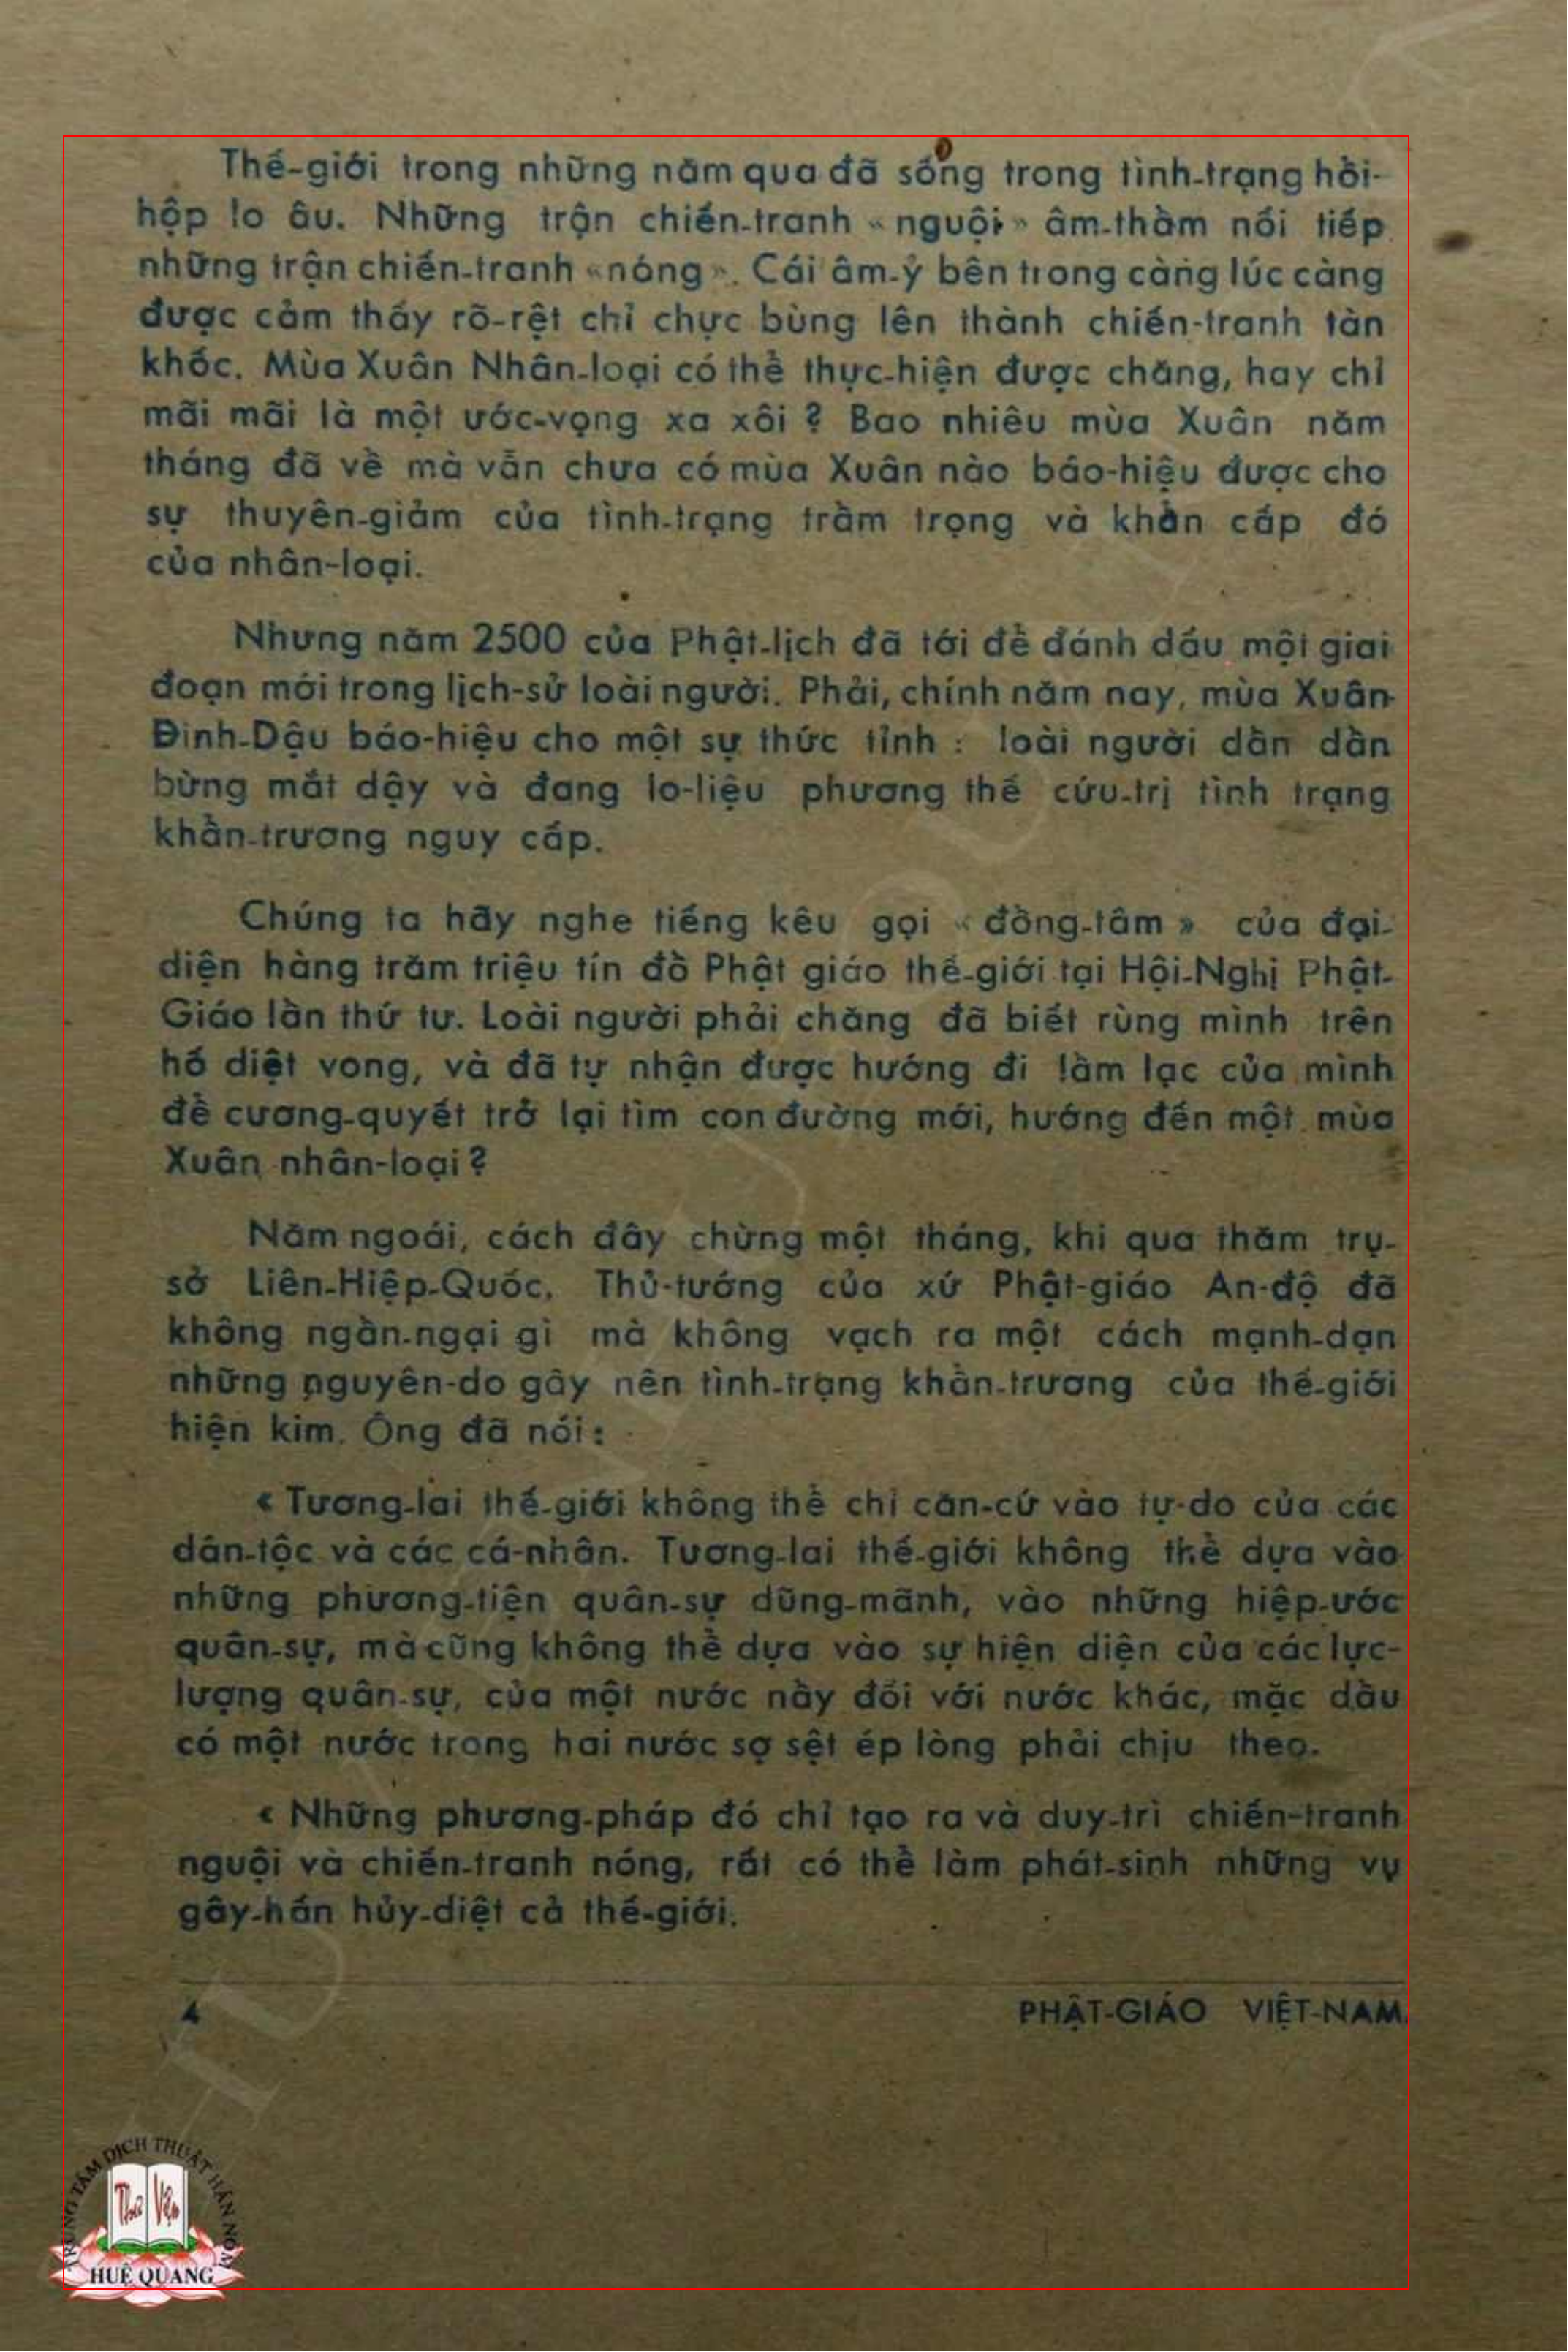

In [74]:
test_image

In [78]:
print(annotations[0].description)

Thế-giới trong những năm qua đã sống trong tình trạng hồi
hộp lo âu. Những trận chiến tranh - nguội âm thầm nối tiếp
những trận chiến tranh nóng . Cái âm.ý bên trong càng lúc càng
được cảm thấy rõ-rệt chỉ chực bùng lên thành chiến tranh làn
khốc. Mùa Xuân Nhân loại có thể thực hiện được chăng, hay chỉ
mãi mãi là một ước vọng xa xôi ? Bao nhiêu mùa Xuân năm
tháng đã về mà vẫn chưa có mùa Xuân nào báo hiệu được cho
sự thuyên giảm của tình trạng trầm trọng và khẩn cấp đó
của nhân-loại.
Nhưng năm 2500 của Phật-lịch đã tới để đánh dấu một giai
đoạn mới trong lịch sử loài người. Phải, chính năm nay, mùa Xuân
Đinh Dậu báo hiệu cho một sự thức tỉnh : loài người dân dàn
bừng mắt dậy và đang lo liệu phương thế cứu trị tình trạng
khẩn trương nguy cấp.
Chúng ta hãy nghe tiếng kêu gọi đồng lâm » của đại.
diện hàng trăm triệu tín đồ Phật giáo thế giới tại Hội Nghị Phật.
Giáo lần thứ tư. Loài người phải chăng đã biết rùng mình trên
hồ diệt vong, và đã tự nhận được hướng đi làm lạc của mình
đề cương q